## FFT

In [1]:
%load_ext lab_black

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from darts import TimeSeries
from darts.models import FFT, AutoARIMA, ExponentialSmoothing, Prophet, Theta
from darts.metrics import mape
from darts.utils.missing_values import fill_missing_values
from darts.datasets import TemperatureDataset, AirPassengersDataset, EnergyDataset

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

Importing plotly failed. Interactive plots will not work.


## Read and format
Here we simply read the CSV file containing daily temperatures, and transform the values into the desired format.

In [3]:
ts = TemperatureDataset().load()

#### Constructing TimeSeries instances for training and validation

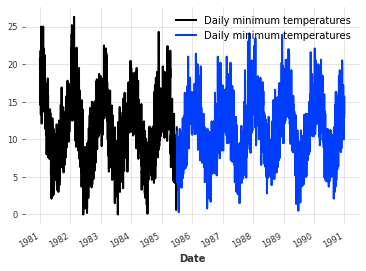

In [4]:
train, val = ts.split_after(pd.Timestamp("19850701"))
train.plot()
val.plot()

#### Basic FFT model

In [5]:
model = FFT(required_matches=set(), nr_freqs_to_keep=None)
model.fit(train)
pred_val = model.predict(len(val))

MAPE: nan


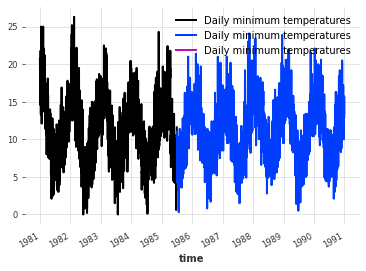

In [6]:
train.plot()
val.plot()
pred_val.plot()
print("MAPE:", mape(pred_val, val))

#### Improvement 1: Crop the training set

In [7]:
model = FFT(nr_freqs_to_keep=None)
model.fit(train)
pred_val = model.predict(len(val))

MAPE: nan


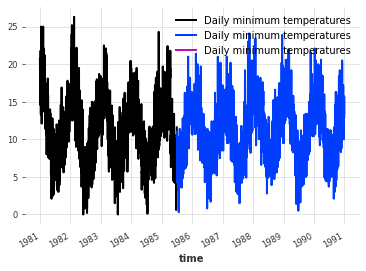

In [8]:
train.plot()
val.plot()
pred_val.plot()
print("MAPE:", mape(pred_val, val))

#### Improvement 2: Filtering out low-amplitude waves

In [9]:
model = FFT(nr_freqs_to_keep=20)
model.fit(train)
pred_val = model.predict(len(val))

MAPE: nan


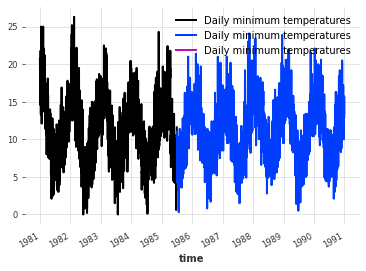

In [10]:
train.plot()
val.plot()
pred_val.plot()
print("MAPE:", mape(pred_val, val))

#### Improvement 3: Detrending

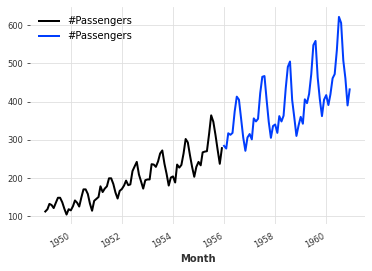

In [11]:
ts_2 = AirPassengersDataset().load()
train, val = ts_2.split_after(pd.Timestamp("19551201"))
train.plot()
val.plot()

In [12]:
model = FFT()
model.fit(train)
pred_val = model.predict(len(val))

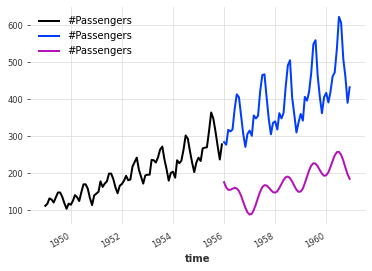

In [13]:
train.plot()
val.plot()
pred_val.plot()

In [14]:
model = FFT(trend="poly")
model.fit(train)
pred_val = model.predict(len(val))

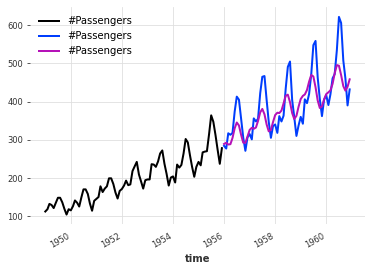

In [15]:
train.plot()
val.plot()
pred_val.plot()

#### New Data: Hourly Nuclear Energy Generation

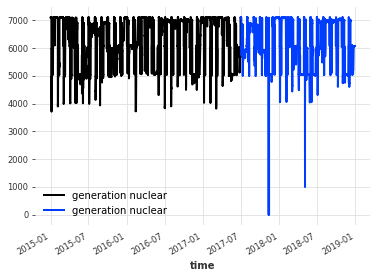

In [16]:
ts_3 = EnergyDataset().load()
ts_3 = fill_missing_values(ts_3, "auto")
ts_3 = ts_3["generation nuclear"]
train, val = ts_3.split_after(pd.Timestamp("2017-07-01"))
train.plot()
val.plot()

In [17]:
models = [AutoARIMA(), Prophet(), ExponentialSmoothing(), Theta(), FFT()]

for model in models:
    model.fit(train)
    pred_val = model.predict(len(val))
    print(str(model) + " MAPE: " + str(mape(pred_val, val)))

Auto-ARIMA MAPE: 13.46753956256134
Prophet MAPE: 10.852517257784061
Exponential smoothing MAPE: 21.05322220891796
Theta(2) MAPE: 13.330007725418852
FFT(nr_freqs_to_keep=10, trend=None) MAPE: 10.263184839655274
